## This is a  diamond data, i will be using scaling method on diamond data. 
Imorting packages 

In [1]:
import pandas as pd
import sklearn.preprocessing as prepro

In [2]:
#Read csv file into data frame
df= pd.read_csv('diamonds.csv')

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Note: Never scale anything that is norminal. 
Norminal datas are numerical data's that are just labels and are mutually exclusive to each other. They are mostly used to categorise or identify something, example 'year 2016' is a norminal data tho numerical, we cant scale it. If we do it looses it meaning because minmax scalling for example brings all values to 1 and 0.


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## in other to determine which variable to scale in a dataset, we must consider the following:
1.Is it a numerical/ not.
2. Is it norminal/not 
3. Check the range of the data (min and max). If the min and max are largely diffrent eg. min is in unit value and max is in thousand, you should scale.
## To determine what method of scalling to used, condiser the following:
1.Is the data skewed, if yes (minmax scakler)
2.Is the data gaussian, if yes(Stardardization scalling)
3.Is the data sparse, if yes (L2 normalisation). Spares data are datas that have a lot of zeros in it. 

###### looking at diamond, we can see that the range of {carrat, depth and table are close i.e they in the same range Ten's. But the price column hasa sig diiffrent range ie min is in 100's and max is in 1000's }

### Plot

In [5]:
import seaborn as sns

<Axes: xlabel='price', ylabel='Count'>

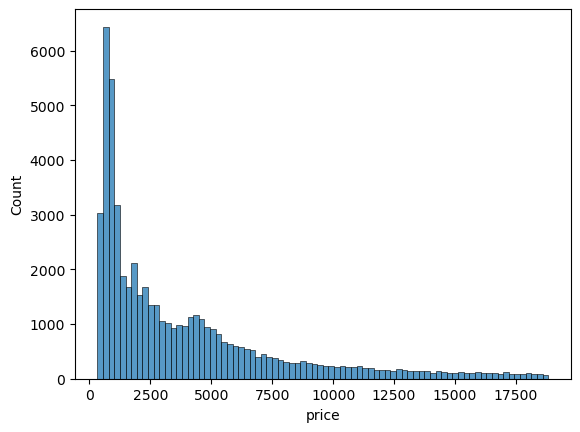

In [6]:
sns.histplot(data=df, x="price")

As seen from the plot, the price column is skewed, so we used MinMax scaler
### Scaling price column

In [7]:
df["price_scaled"]= prepro.minmax_scale(df[["price"]])

### Disclaimer: CodeMentor explainer
"The function being used here is prepro.minmax_scale(), which is a part of the minmax_scale module in the prepro library. This function is used to scale the values of a given feature or column to a specified range, typically between 0 and 1.

In this case, the "price" column is being selected from the DataFrame using double square brackets df[["price"]]. The double square brackets are used to select a single column as a DataFrame, rather than a Series.

The minmax_scale() function takes this selected column as an input and returns the scaled values. The scaled values are then assigned to a new column called "price_scaled" in the original DataFrame using the assignment operator =.

This line of code is useful when working with numerical data that has a wide range of values. Scaling the values to a specific range can help in improving the performance of certain machine learning algorithms, as it ensures that all features are on a similar scale."

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_scaled
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.000000
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.000000
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.000054
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.000433
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.000487


<Axes: xlabel='price_scaled', ylabel='Count'>

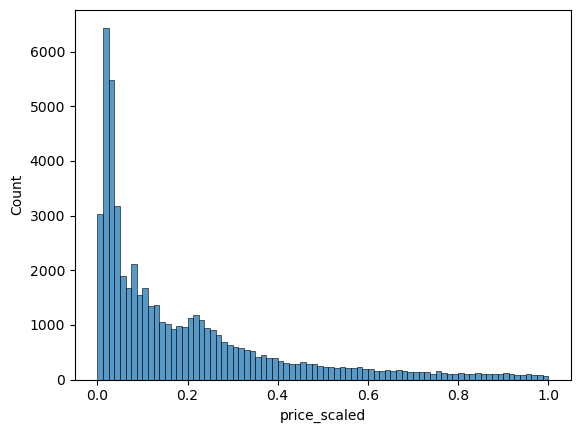

In [9]:
sns.histplot(data=df, x="price_scaled")

As show above the price column as been scaled but even at that the shape/ pattern/ distribution in the price column remain unultred, this is because the goal of scalling is not to alter the pattern but to bring it into data between 0 and 1

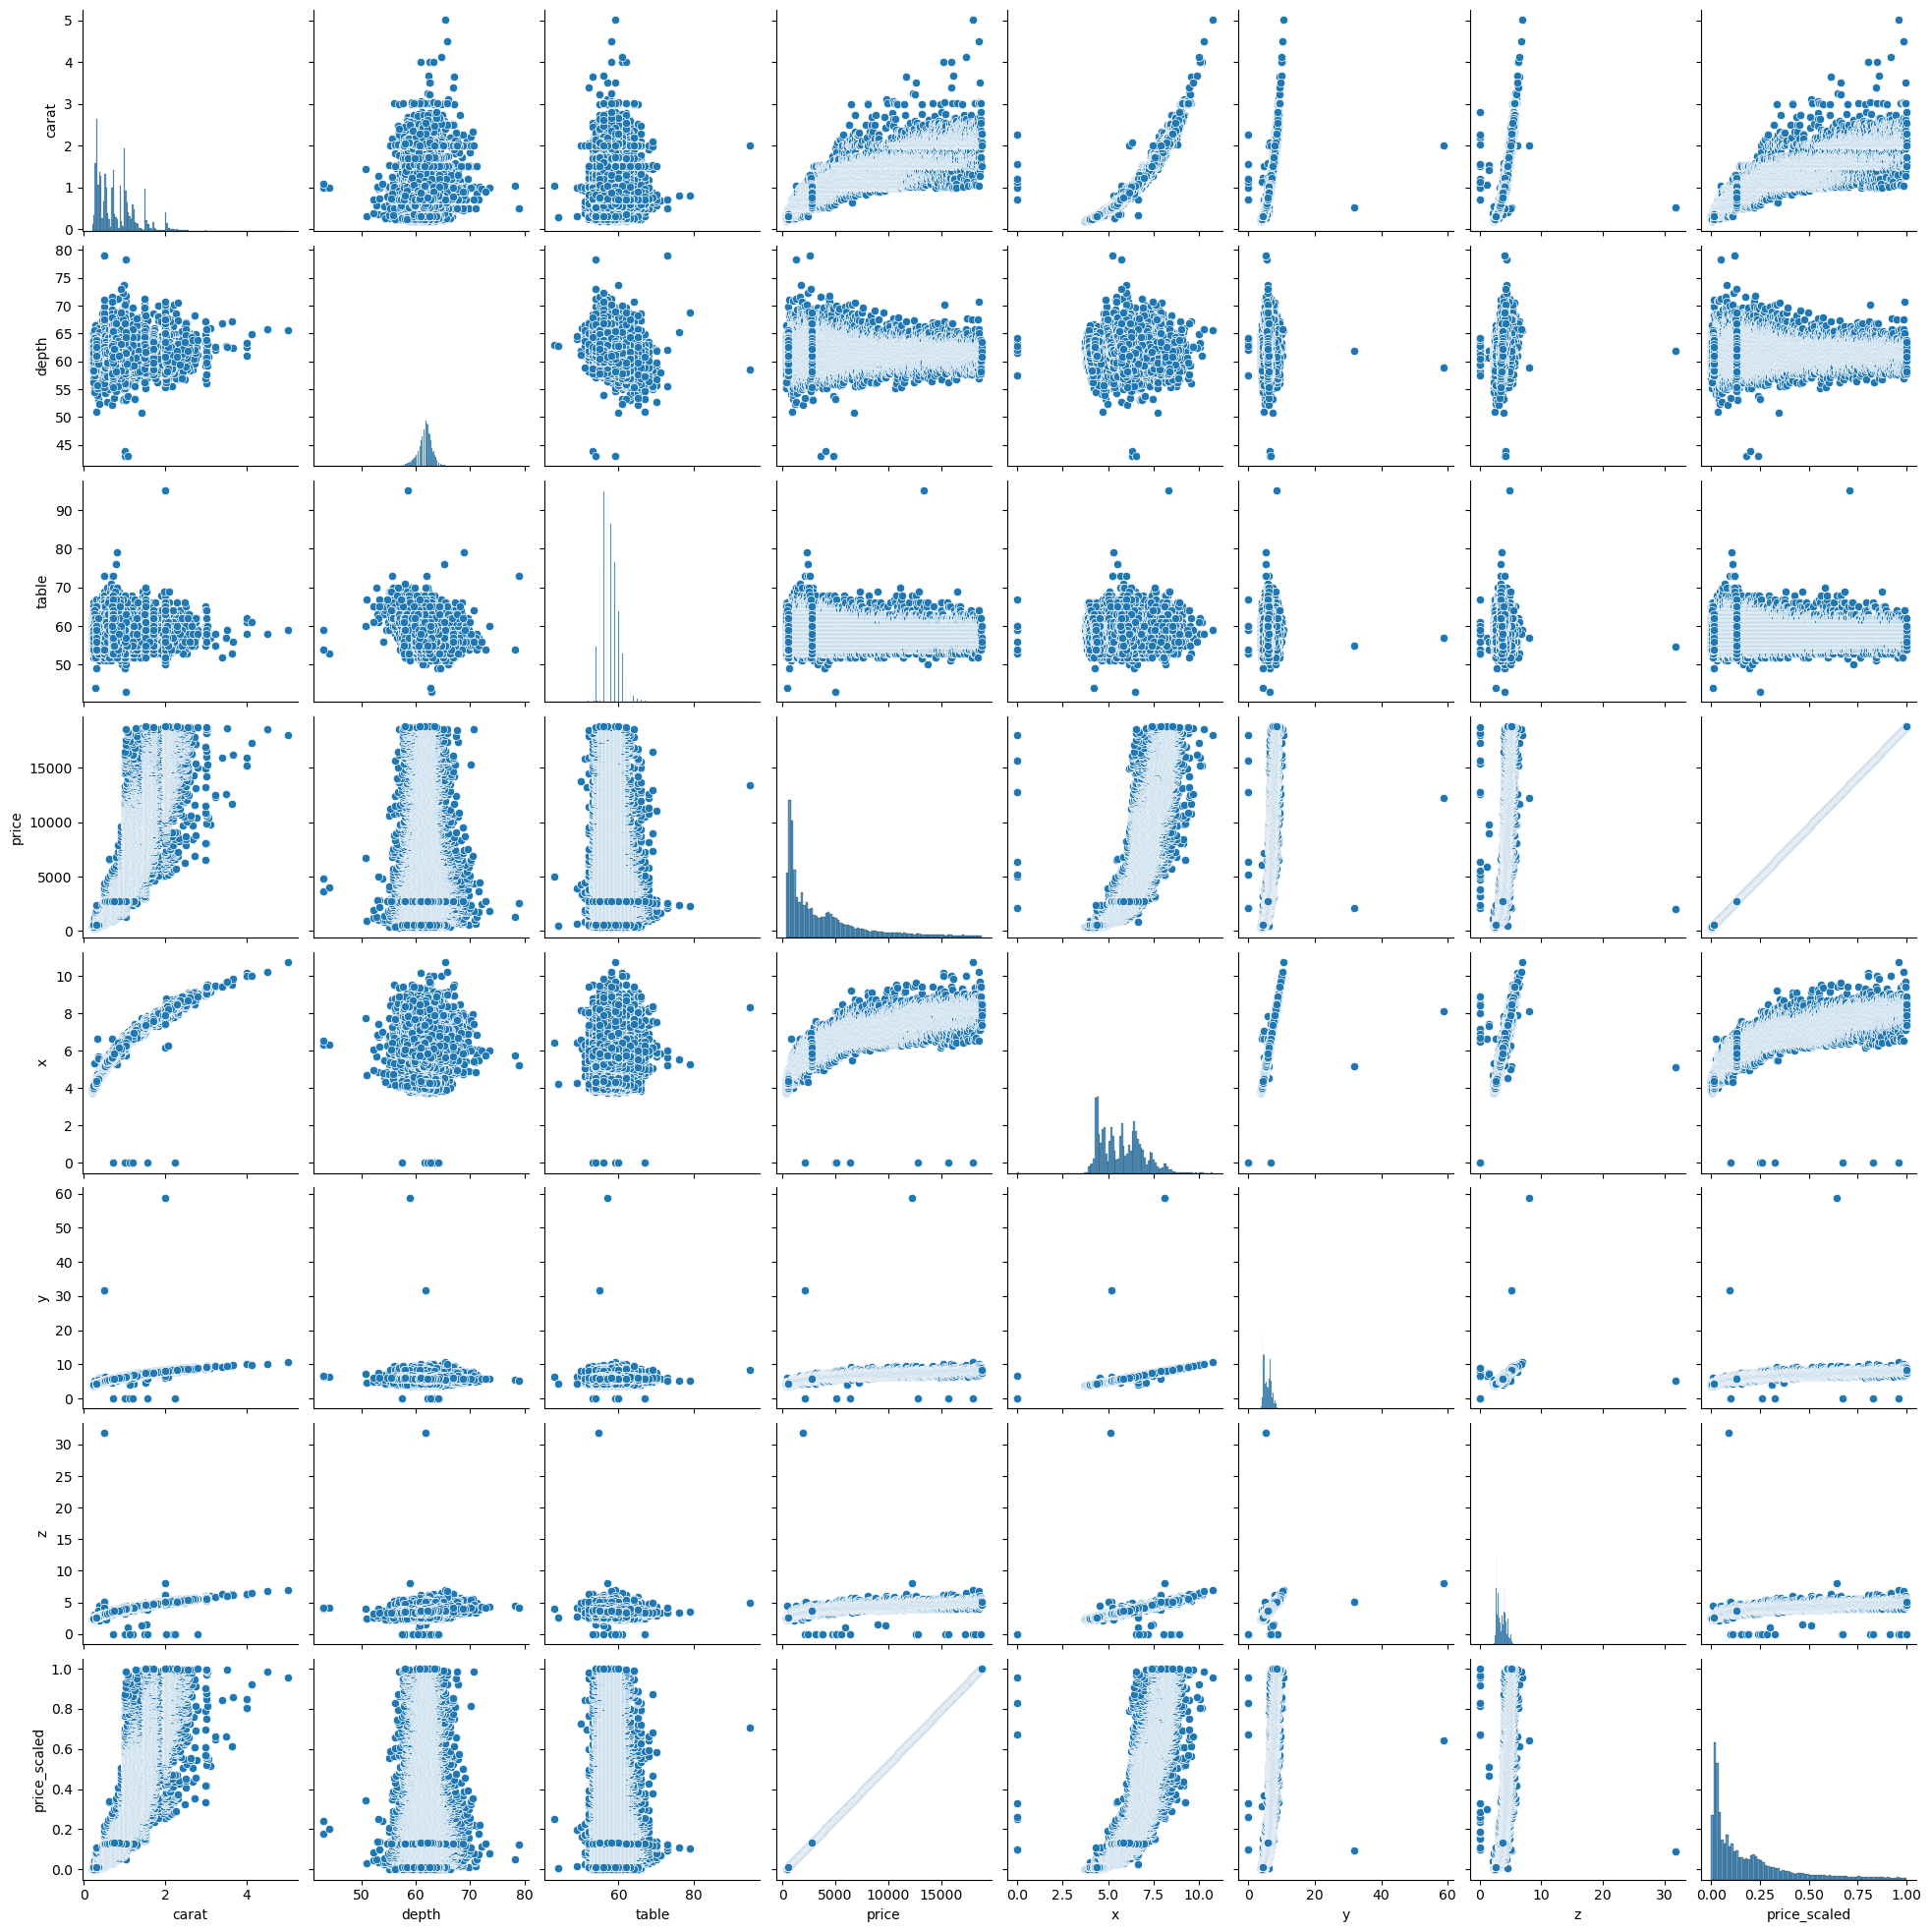

In [10]:
sns.pairplot(df)

If we look at the pair plot above, we can see that depth column kindof have a gaussian distribution. To confirm thus we can histplot it's distribution. 


In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'depth column distribution')

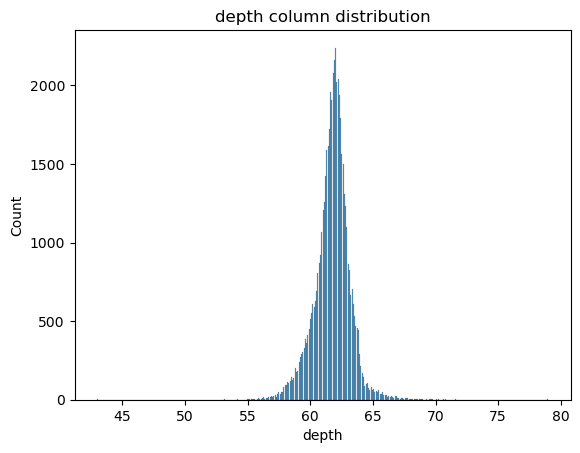

In [12]:
sns.histplot(data=df, x= "depth")
plt.title("depth column distribution")

Haven confirmed it is certaily a normally distributed data, we can use the 'standard scaler' to scale it. 

In [18]:
df['depth_scaled']= prepro.StandardScaler().fit_transform(df[["depth"]])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_scaled,depth_scaled
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.000000,-0.174092
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.000000,-1.360738
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.000054,-3.385019
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.000433,0.454133
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.000487,1.082358



***prepro.StandardScaler().fit_transform(df[["depth"]])***


"This line of code is used to create a new column in a dataframe called 'depth_scaled'. The values in this new column will be the scaled values of the 'depth' column in the dataframe.

The 'prepro.StandardScaler()' part of the code is creating an instance of the StandardScaler class from the preprocessing module in the scikit-learn library. The StandardScaler class is used to standardize features by removing the mean and scaling to unit variance.

The 'fit_transform()' method is then called on the StandardScaler instance. This method fits the scaler to the 'depth' column data and then transforms the data by applying the scaling. The 'fit_transform()' method returns the transformed data, which is then assigned to the 'depth_scaled' column in the dataframe.

The 'df[["depth"]]' part of the code is selecting the 'depth' column from the dataframe and passing it as input to the scaler's 'fit_transform()' method. The double square brackets are used to create a dataframe with a single column, as the 'fit_transform()' method expects a 2D array-like input.

Overall, this line of code is performing feature scaling on the 'depth' column in the dataframe and storing the scaled values in a new column called 'depth_scaled'." (code-mentor.ai)

## Histo_plot depth

<Axes: xlabel='depth_scaled', ylabel='Count'>

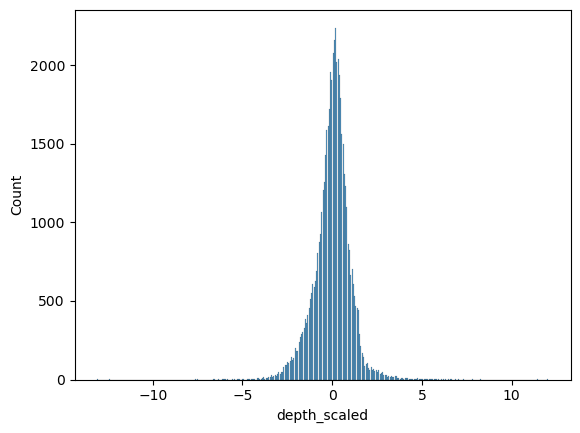

In [14]:
sns.histplot(data=df, x='depth_scaled')

As shown above, the pattern is unultered but the depth has been scaled using the standardise scale method. It is worth noting that the standardised scaler scales the data by removing the mean, and 

## Note on scaling
1. scaling should be done after cleaning
2. Don't scale norminal data
3. Dont scale dependent variable, if we do ML will predict scaled value not actual values. 
4. Use Normalisation for gaussian distribution, MinMax for skwed data, Normalizatio L2 for spared data.


## How to unscale data

In [15]:
from sklearn.preprocessing import StandardScaler # This line of code imports starndard scaler algarithm from the preprocessing
# Laibrary in sklearn. 

In [16]:
sc= StandardScaler() #StandardScaler is stored in the variable 'sc'

In [20]:
df['depth_scaled']= sc.fit_transform(df[["depth"]]) # 
# "using sc, fit transform depth column from df to standard scale, and store operation in variable 'df['depth_scaled']'.'

In [23]:
#df['depth_scaled']= prepro.StandardScaler().fit_transform(df[["depth"]])
df['unscale_depth']=sc.inverse_transform(df[['depth_scaled']])
df.head()
# Using the invers transform method, unscale the 'df['depth_scaled'] you scaled intitially, and store Unsclaed 
# column in new variable "df['unscale_depth']". 

,carat,cut,color,clarity,depth,table,price,x,y,z,price_scaled,depth_scaled,unscale_depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.000000,-0.174092,61.5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0.000000,-1.360738,59.8
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.000054,-3.385019,56.9
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.000433,0.454133,62.4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.000487,1.082358,63.3


Scaled vs un_scaled values of depth 
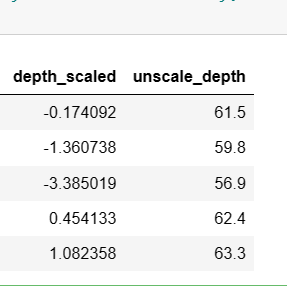

In [25]:
pip install RISE 

     ---------------------------------------- 0.0/4.3 MB ? eta -:--:--
     -- ------------------------------------- 0.2/4.3 MB 5.0 MB/s eta 0:00:01
     ------- -------------------------------- 0.8/4.3 MB 8.5 MB/s eta 0:00:01
     -------------------- ------------------- 2.2/4.3 MB 15.2 MB/s eta 0:00:01
     ---------------------------- ----------- 3.1/4.3 MB 16.4 MB/s eta 0:00:01
     ---------------------------------------  4.3/4.3 MB 19.5 MB/s eta 0:00:01
     ---------------------------------------- 4.3/4.3 MB 16.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
